<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Worksheets/8_1_Correlation_with_linregress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively and visually
---

This worksheet introduces **scipy** library

A library of functions for interpolating, optimising, linear regression, etc  

---

A dataset will be read into a dataframe, cleaned, wrangled and so prepared for summarising and the telling of stories through visualisations and summaries.

So far we have covered statistical measures over an individual series.  Linear regression reports correlation between the values in two series.

To get the results of a linear regression:  
*  import the `linregress` function from the `scipy.stats` package 
*  run the `linregress` function with the two axes assigning the result to a variable (e.g. `regression`) 

The result of the linregress function is a set of variables:  
*  `slope`, `intercept` - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in `regression.slope` and `regression.intercept`
*  `rvalue` - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit
*  `pvalue` - the probability of error if the regression line is extended to predict
*  the standard error is in `regression.stderr` and is the average distance of each data point from the lineof best fit 


Further information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)


### Exercise 1 - is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  display the rvalue (which indicates how closely income follows age and whether it goes up as age goes up or goes down as age goes up 

In [1]:
!pip install --upgrade openpyxl

     |████████████████████████████████| 242 kB 4.8 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats.stats import pearsonr

def get_excel_data(url,str):
  df = pd.read_excel(url,sheet_name=str)
  return df

def regression_model(x,y):
  lin_model = stats.linregress(x, y)
  return lin_model

url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
income_df = get_excel_data(url,"county-level")

x= income_df['Age']
y= income_df['Income']

lin_model = regression_model(x,y)
print(lin_model)
print("The slope is",lin_model.slope)
print("This indicates that the line plotting Income against Age slopes downward implying that income reduces with age")
print("The intercept is",lin_model.intercept)
print("This indicates that income level starts at", lin_model.intercept, "and reduces from there by age")
print(f"R-squared: {lin_model.rvalue**2:.4f}")
print("P-value is", lin_model.pvalue, "indicating that the model is NOT significant")

LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189)
The slope is -0.31433084434233205
This indicates that the line plotting Income against Age slopes downward implying that income reduces with age
The intercept is 72.78388856978748
This indicates that income level starts at 72.78388856978748 and reduces from there by age
R-squared: 0.0219
P-value is 0.5581637648902298 indicating that the model is NOT significant


The p-value indicates that age is not a good factor to predict income.

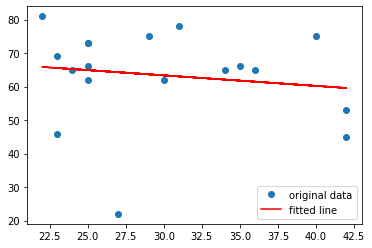

In [3]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='original data')
plt.plot(x, lin_model.intercept + lin_model.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

### Exercise 2 - Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Expected output**:   
0.013558605755058871


In [4]:
x1 = income_df['Population']
model_pop = regression_model(x1,y)

print("The slope is",model_pop.slope)
print("This indicates that the line plotting Income against population nearly stays the same implying that income has no significant change with population")
print("The intercept is",model_pop.intercept)
print("This indicates that income level starts at", model_pop.intercept, "almost remains the same")
print(f"R-squared: {model_pop.rvalue**2:.4f}")
print("P-value is", model_pop.pvalue, "indicating that the model is NOT significant")

The slope is 0.05737132629483762
This indicates that the line plotting Income against population nearly stays the same implying that income has no significant change with population
The intercept is 60.95698211316883
This indicates that income level starts at 60.95698211316883 almost remains the same
R-squared: 0.0136
P-value is 0.6454275157910035 indicating that the model is NOT significant


The model clearly shows that there is not very significant correlation between population and income level. So there is no point in attempting to predict income based on population.

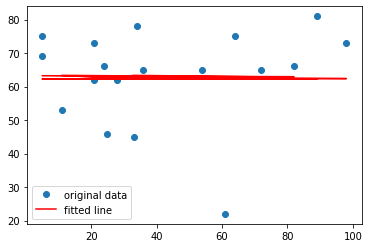

In [5]:
plt.plot(x1, y, 'o', label='original data')
plt.plot(x1, model_pop.intercept + model_pop.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

Regardless of the population, the income remains (relatively) flat. so population cannot predict income.

### Exercise 3 - Does Stress predict Wellbeing?
---

Repeat the steps in Exercises 1 & 2 to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later 

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

In [6]:
def get_csv_data(url):
  df = pd.read_csv(url)
  return df  

url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data = get_csv_data(url)

s = psych_data["Stress"]
w = psych_data["Wellbeing"]

model_stress = regression_model(s,w)

print("The slope is",model_stress.slope)
print("This indicates that the line plotting Wellbeing against stress slopes downward implying that wellbeing goes down as the stress level increases")
print("The intercept is",model_stress.intercept)
print("This indicates that Wellbeing starts at", model_stress.intercept, "goes down as stress level increases")
print(f"R-squared: {model_stress.rvalue**2:.4f}")
print("P-value is", model_stress.pvalue, "indicating that the model is significant")

print(model_stress)


The slope is -0.6279050248852254
This indicates that the line plotting Wellbeing against stress slopes downward implying that wellbeing goes down as the stress level increases
The intercept is 37.713488379900454
This indicates that Wellbeing starts at 37.713488379900454 goes down as stress level increases
R-squared: 0.4508
P-value is 6.084540561441803e-07 indicating that the model is significant
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)


Stress and wellbeing are highly correlated and the p-values shows that this correlation is highly significant. Given the negative slope, we can see that as stress increases, wellbeing goes down.

# Create some charts and make some predictions from regressions

1.  Using what you know from completing the Visualisation worksheets (matplotlib and Seaborn), plot the various regression results in a set of charts.
2.  Use the slope and intercept to calculate a prediction for a reasonable value (e.g. predict an income for a given age using the slope and intercept from the regression to calculate income from the formula `age * slope + intercept`

Oops! Already did it in exercise 3! But I will try seaborn for stress model.

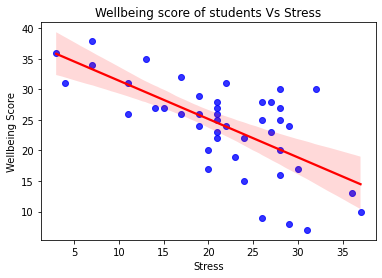

In [7]:
import seaborn as sns

chart=sns.regplot(x=s, y=w, data = model_stress.slope*s+model_stress.intercept, color = 'blue', line_kws={'color': 'red'})
chart.set_xlabel("Stress")
chart.set_ylabel("Wellbeing Score")
chart.set_title("Wellbeing score of students Vs Stress")
sns.set_style("darkgrid", {"grid.color": "1", "grid.linestyle": ":"})

# Further reference on linear regression

[at statisticalsolutions.com](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/)